![logo](https://www.tec.ac.cr/sites/default/files/media/branding/logo-tec.png "TEC")

# Big Data, Programa de Ciencia de los Datos

## Proyecto Final

### Entregable #2: Proyecto programado

* Esteban Sáenz Villalobos (**esaenz7@gmail.com**).
* Entrega: 6 de septiembre 2021, 23:00.
* Valor: 20%.

---

## Objetivo

Aplicar técnicas para extracción, transformación, carga de datos realistas de la vida cotidiana y generar predicciones a partir de esos datos depurados.

## Resultados esperados para esta asignación

La realización de este proyecto busca que los estudiantes se expongan a las complejidades que implican obtener datos reales que provienen de múltiples fuentes. Se espera que realicen una investigación preliminar donde buscarán conjuntos de datos, abiertos o de su ámbito laboral, que provengan de múltiples fuentes. Posteriormente, deberán preprocesar e integrarlos de manera que puedan ser utilizados para propósitos analíticos y predictivos. Los resultados serán presentados en la clase final del módulo.

---

## Entrega

Repositorio de código que incluye configuración de contenedores, código en
Python con pruebas, Jupyter Notebook (dentro del repositorio de manera opcional), análisis de resultados y Archivo PDF con instrucciones de ejecución en TEC Digital a más tardar el Lunes 6 de Setiembre de 2021 a las 11:00PM.

Una vez que se haya escogido los dos (o más) conjuntos de datos y se haya definido el objetivo de predicción, se procederá a la implementación de todo el código para respaldarlo. El desglose funcional y por puntaje es:

  * Cargado y preprocesamiento de datos (antes de cruzarlos). Se espera que los
estudiantes desarrollen módulos en Python para cargar los datos escogidos y ajustarlos de manera que sean fáciles de utilizar en la fase de predicción posterior. Este apartado cubre el desarrollo del código para cargarlos y crear las transformaciones de Spark necesarias a nivel de dataframe. Al no incluir escritura a la base de datos, en este punto, los estudiantes deberán realizar todas las pruebas unitarias necesarias para demostrar que los datos han sido cargados y preprocesados correctamente. La evaluación de esta sección se enfocará mayoritariamente en las pruebas. (7%)

  * Materialización en PostgreSQL. Una vez que los datos estén preparados, deberán
escribirse a una base de datos PostgreSQL, utilizando el esquema de contenedor
secundario. Para ello se desarrollará un programa principal en Python, cuyo uso deberá documentarse detalladamente en el PDF de instrucciones. Este programa utilizará todos los módulos anteriores y agrega la funcionalidad necesaria para escribir los conjuntos de datos antes y después de cruzados. Se espera que la estructura de la base de datos sea expuesta con claridad en las instrucciones, ya que la validación para calificación incluirá correr consultas SQL. Para ello se requiere entender la estructura. (3%)

  * Modelo de predicción. Se deberá desarrollar al menos dos modelos de predicción,
utilizando las bibliotecas de aprendizaje automático de Spark, sobre el objetivo planteado en el primer entregable de este proyecto. Los elementos típicos para el
desarrollo correcto de modelos (vistos en el módulo de aprendizaje) aplicarán aquí. Se deberá generar un programa principal que se pueda ejecutar desde el contenedor con suficiente información de rastreo para determinar que la implementación fue realizada correctamente. En esta sección se permite que los estudiantes utilicen Jupyter notebooks, agregados al repositorio de código entregado. En caso de utilizar esta opción, los estudiantes deberán agregar la configuración necesaria al Dockerfile entregado para que sea accesible desde la máquina real. Para cualquiera de las dos alternativas, deberá ser documentado, en detalle, en el PDF de documentación que se entregará. Todos los pasos para reproducir la ejecución del modelo deberán ser explicados en la misma. (7%)

  * Análisis de resultados. Derivado del entrenamiento de modelos, deberá analizarse los resultados de cada uno por separado, primero, y posteriormente una comparación entre ambos. Debe explicarse con detalle por qué alguno funciona mejor o no. Se deja a criterio de los estudiantes agregar cualquier elemento que consideren enriquezca este análisis de resultados. (3%)

---

# Índice

*   Parte I

  * Acerca del problema.
    
      * Objetivo del proyecto.

      * Descripción general de los conjuntos de datos.

      * Estrategia del proyecto.

*   Parte II

  * Carga, pre-procesamiento, visualización, ingeniería de características y almacenamiento.

  * Ejecución y pruebas unitarias.

  * Jupyter Notebook.

      * Modelos: regresión logística y bosques aleatorios.

      * Entrenamiento.

      * Evaluación.

  * Análisis de resultados y conclusiones.

---

## Objetivo del proyecto y descripción general de los conjuntos de datos

![flights banner](https://drive.google.com/uc?export=view&id=1cxwjNU-QgNu1i7fsQCC9FqM-Ec-DNJBx)

* Nombre del proyecto: ***Predicción de vuelos demorados para el sector aeronáutico doméstico de los EEUU***.

* Objetivo predictivo: el proyecto tiene como objetivo general utilizar las técnicas de ETL y aprendizaje automático para poder predecir, por medio del modelado de patrones a partir de un sub-conjunto de entrenamiento, ***el estado de un vuelo en particular, siendo este clasificado de forma binaria como: "a tiempo" o "demorado"***, para lo cual se validará dicho modelo a través de un sub-conjunto de prueba cuyos resultados serán utilizados para la obtención de métricas específicas que permitan analizar su rendimiento.

* Ruta:

    a) Realizar la carga, exploración, análisis, filtrado y limpieza de datos correspondiente para cada dataset.

    b) Determinar a partir de la columna de demora en el arribo "arr_delay", el valor de tiempo que permitirá realizar la clasificación binaria entre un vuelo demorado y un vuelo a tiempo.
    
    c) Definir la columna correspondiente para dichas clases. La columna objetivo o "target" se llamará "**delayed**" y contendrá el valor booleano para las 2 clases posibles de resultados: "demorado" o "a tiempo".

    d) Relizar la unión de los datasets a partir de las columnas correspondientes según se detalla con el siguiente pseudocódigo (algunos nombres de columnas son modificados durante la fase de preparación para facilitar su uso):

      # dataframe -> join(flights.origin == airports.iata)
      # dataframe -> join(airports.icao == weather.airportcode 
                          & flights.date == weather.date)

  En este caso se realizará la unión de los conjuntos de datos principales de vuelos ("flights") y eventos meterológicos ("weather") por medio de un dataset intermedio con la lista de aeropuertos ("airports"), el cual posee los códigos IATA e ICAO que utilizan respectivamente los datasets principales. Además se incorpora una llave adicional entre fechas, para mantener la relación del vuelo con el evento meteorológico reportado según el día en particular.

    e) Filtrar y preparar las columnas y sub-conjuntos para el proceso de aprendizaje automático.

    f) Entrenar los modelos de clasificación seleccionados.

    g) Medir y analizar el rendimiento de cada modelo aplicado.
    
    h) Realizar los ajustes que se consideren pertinentes y repetir los pasos f y g.

* Contexto y alcance: el proyecto tiene como contexto los vuelos domésticos registrados en EEUU durante el año 2018, al cual se adjuntan los registros de eventos meteorológicos y su severidad ocurridos para cada día del año y para cada aeropuerto en particular. Ambos datasets son unidos gracias al conjunto de datos proporcionado por la lista extensa de aeropuertos del repositorio "openflights.org" el cual aporta tanto el código IATA (International Air Transport Association) utilizado coloquialmente para el manejo de vuelos comerciales, como el código oficial ICAO (International Civil Aviation Organization) utilizado para identificar las estaciones de medición meteorológica.

* Limitaciones: en cuanto a su diseño, desarrollo e implementación del modelo de aprendizaje automático, el proyecto comprende todos los requerimientos establecidos y se encuentra limitado básicamente por la capacidad computacional del equipo utilizado.

* Fuentes de datos analizadas: el proyecto está basado en los datos de 2 archivos CSV y 1 archivo DAT, provenientes de 2 fuentes distintas de dominio público.
  
  * Kaggle

    1. [Airline Delay and Cancellation Data, 2018](https://www.kaggle.com/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018?select=2018.csv) [archivo "***2018.csv -> flights.csv***"]. La Oficina de Estadísticas de Transporte del Departamento de Transporte de los EE. UU. (DOT) rastrea el desempeño puntual de los vuelos nacionales operados por grandes compañías aéreas. La información resumida sobre el número de vuelos puntuales, retrasados, cancelados y desviados se publica en este conjunto de datos de vuelos de 2018.
    2. [US Weather Events (2018)](https://www.kaggle.com/sobhanmoosavi/us-weather-events) [archivo "***WeatherEvents_Jan2016-Dec2020.csv -> weather.csv***"].Se trata de un conjunto de datos de eventos meteorológicos de todo EEUU que incluye 6,3 millones de eventos y cubre 49 estados. Los datos se recopilan desde enero de 2016 hasta diciembre de 2020, utilizando informes meteorológicos históricos que se recopilaron de 2,071 estaciones meteorológicas en aeropuertos en todo el país.

  * Openflights

    1. [Open data downloads](https://openflights.org/data.html) [archivo "***airports.dat -> airports.csv***"]. La base de datos de aeropuertos de OpenFlights contiene más de 10,000 aeropuertos, estaciones de tren y terminales de ferry en todo el mundo.

* Descripción detallada: a continuación se procede a realizar un análisis descriptivo de los datos por medio de códificación y visualizaciones.

--- 

### Glosario

	fl_date: fecha del vuelo.
    op_carrier: identificador de la aerolínea.
    origin: código de aeropuerto de salida.
    dest: código del aeropuerto de destino.
    crs_dep_time: hora de salida planificada.
    dep_time: hora real de salida.
    dep_delay: retraso total a la salida en minutos.
    taxi_out: el tiempo transcurrido entre la salida de la puerta del aeropuerto de origen y el despegue.
    wheels_off: el momento en el que las ruedas de la aeronave abandonan el suelo.
    wheels_on: el momento en el que las ruedas de la aeronave tocan el suelo.
    taxi_in: el tiempo transcurrido entre el aterrizaje y la llegada a la puerta del aeropuerto de destino.
    crs_arr_time: hora prevista de llegada.
    arr_time: hora de llegada real = hora de llegada - llegada_programada.
    arr_delay: retraso total a la llegada en minutos.
    cancelled: vuelo cancelado (1 = cancelado).
    diverted: aeronave aterrizó en un aeropuerto diferente al programado.
    crs_elapsed_time: cantidad de tiempo planificada necesaria para el viaje de vuelo.
    actual_elapsed_time: tiempo_aire + taxi_in + taxi_out.
    air_time: la duración de tiempo entre wheels_off y wheels_on time.
    distance: distancia entre dos aeropuertos.
    severe-cold: el caso de tener una temperatura extremadamente baja, con temperatura por debajo de los -23,7 grados centígrados.
    fog: el caso en el que hay una condición de baja visibilidad como resultado de la niebla o neblina.
    hail: el caso de tener precipitaciones sólidas que incluyen gránulos de hielo y granizo.
    rain: el caso de tener lluvia, que va de ligera a fuerte.
    snow: el caso de tener nieve, que va de ligera a fuerte.
    storm: la condición de mucho viento, donde la velocidad del viento es de al menos 60 km / h.
    other precipitation: cualquier otro tipo de precipitación que no pueda asignarse a los tipos de eventos descritos anteriormente.
    iata: código IATA de 3 letras, si está disponible.
    icao: código ICAO de 4 letras, si está disponible.

---

## Estrategia del proyecto

<div><img src="https://drive.google.com/uc?export=view&id=1YBLbLdBaPid5y9XXWNDMm2msuA4wKWAu" width="700"/></div>

* Preparación de los datos e ingeniería de características

* Partición de los datos

* Modelos

  * Regresión logística

  <div><img src="https://drive.google.com/uc?export=view&id=1UB50E6q5fe8ZnRbQsAauF5U2PxXrtGmX" width="700"/></div>

  * Bosques aleatorios

  <div><img src="https://drive.google.com/uc?export=view&id=1yplZYKLAzMCKlKgUntkzMIhApm3MdhRS" width="700"/></div>

* Entrenamiento

* Evaluación de los modelos de aprendizaje

<div><img src="https://drive.google.com/uc?export=view&id=1ynIWIYFOoJQQ6o2eJzBw7NEuqCD1xu4E" width="700"/></div>

  * ROC

    La tasa de verdaderos positivos (sensibilidad) describe qué tan bueno es el modelo para predecir la clase positiva cuando el resultado real es positivo. El AUC es útil para describir la habilidad del modelo (asignar una probabilidad más alta a una ocurrencia positiva real elegida al azar que a una ocurrencia negativa en promedio).

  * PR

    "Precision" describe qué tan bueno es un modelo para predecir la clase positiva, se conoce como valor predictivo positivo. "Recall" es lo mismo que la sensibilidad. Esta métrica es útil en los casos en que existe un desequilibrio en las observaciones entre las dos clases, hay muchos ejemplos clase 0 y solo algunos ejemplos clase 1.
    
    El F1 score calcula la media armónica del PR. El AUC resume la integral o una aproximación del área bajo la curva.

---

## Recursos

---

In [1]:
%%file recursos.py
'''
Nombre de archivo:
  +recursos.py
Descripción: 
  +Librería con recursos varios para la aplicación
'''

#librerías
from IPython.display import Javascript
import sys, os, glob, datetime as dt, numpy as np, random, collections as coll
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from pyspark.sql import SparkSession, functions as F, window as W, DataFrame as DF
from pyspark.sql.types import (DateType, IntegerType, FloatType, DoubleType, LongType, StringType, StructField, StructType, TimestampType)
from pyspark.ml import functions as mlF, Pipeline as pipe
from pyspark.ml.stat import Correlation
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import Imputer, StandardScaler, MinMaxScaler, Normalizer, PCA, StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, DecisionTreeClassificationModel, RandomForestClassifier, GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics, MulticlassMetrics
from pyspark.ml.tuning import CrossValidator, CrossValidatorModel, ParamGridBuilder
from functools import reduce
from difflib import SequenceMatcher as seqmatch
import findspark
# findspark.init('/usr/lib/python3.7/site-packages/pyspark')
# !pip install -q handyspark
# from handyspark import *

#variables postgres
# args = sys.argv
# print(args)
#estos parámetros corresponden a la instancia de postgres dentro del ambiente de docker que se adjunta al trabajo
host = '10.7.84.102'
port = '5432'
user = 'postgres'
password = 'testPassword'

#sesión de spark
spark = SparkSession.builder\
  .master("local")\
  .appName("Main")\
  .config('spark.ui.port', '4050')\
  .config("spark.driver.extraClassPath", "postgresql-42.2.14.jar") \
  .config("spark.executor.extraClassPath", "postgresql-42.2.14.jar") \
  .config("spark.jars", "postgresql-42.2.14.jar") \
  .getOrCreate()
spark.sparkContext.setLogLevel("ERROR")

#funciones
#función para almacenar en base de datos
def escribir_df(df, host=host, port=port, user=user, password=password, table='table'):
  try:
    #almacenamiento en base de datos
      # .option("driver", "postgresql-42.2.14.jar") \
    df \
      .write \
      .format("jdbc") \
      .mode('overwrite') \
      .option("url", "jdbc:postgresql://"+host+":"+port+"/postgres") \
      .option("user", user) \
      .option("password", password) \
      .option("dbtable", table) \
      .save()
    return True
  except Exception as e:
    exc_type, exc_obj, exc_tb = sys.exc_info()
    print(exc_type, os.path.split(exc_tb.tb_frame.f_code.co_filename)[1], exc_tb.tb_lineno, exc_obj)
'''
La ejecución de spark es una ejecución vaga ("lazy"), si se intenta almacenar un dataframe en una tabla la cual es a su vez su propia fuente de datos, 
dicha tabla será sobreescrita con valores nulos quedando vacía, por lo tanto en dichos casos se recomienda utilizar una tabla temporal.
'''
#función para cargar de base de datos
def leer_df(host=host, port=port, user=user, password=password, table='table'):
  try:
    #lectura desde base de datos hacia dataframe temporal
      # .option("driver", "postgresql-42.2.14.jar") \
    df = spark \
      .read \
      .format("jdbc") \
      .option("url", "jdbc:postgresql://"+host+":"+port+"/postgres") \
      .option("user", user) \
      .option("password", password) \
      .option("dbtable", table) \
      .load()
    df.count()
    return df
  except Exception as e:
    exc_type, exc_obj, exc_tb = sys.exc_info()
    print(exc_type, os.path.split(exc_tb.tb_frame.f_code.co_filename)[1], exc_tb.tb_lineno, exc_obj)

#función columnas-vector
def cols2vec(dfin, inputcols=[], outputcol='features', label='label', lab_alias='label', print_=False):
  try:
    assy = VectorAssembler(inputCols=inputcols, outputCol=outputcol, handleInvalid='skip')
    dfout = assy.transform(dfin)
    if lab_alias:
      dfout = dfout.select([outputcol, F.col(label).alias(lab_alias)])
    else:
      dfout = dfout.select([outputcol])
    if print_: dfout.show(10, truncate=False)
    return dfout
  except Exception as e:
    exc_type, exc_obj, exc_tb = sys.exc_info()
    print(exc_type, os.path.split(exc_tb.tb_frame.f_code.co_filename)[1], exc_tb.tb_lineno, exc_obj)

#función vector-columnas
def vec2cols(dfin, inputcol='features', outputcols=[], label='label', lab_alias='label', print_=False, prediction=None):
  try:
    if lab_alias:
      if prediction:
        dfout = dfin.select(inputcol, label, prediction).withColumn('temp', mlF.vector_to_array(inputcol)) \
        .select([F.col('temp')[i].alias(outputcols[i]) for i in range(len(outputcols))] + [F.col(label).alias(lab_alias)] + [F.col(prediction)])
      else:
        dfout = dfin.select(inputcol, label).withColumn('temp', mlF.vector_to_array(inputcol)) \
        .select([F.col('temp')[i].alias(outputcols[i]) for i in range(len(outputcols))] + [F.col(label).alias(lab_alias)])
    else:
      dfout = dfin.select(inputcol, label).withColumn('temp', mlF.vector_to_array(inputcol)) \
      .select([F.col('temp')[i].alias(outputcols[i]) for i in range(len(outputcols))])
    if print_: dfout.show(10, truncate=False)
    return dfout
  except Exception as e:
    exc_type, exc_obj, exc_tb = sys.exc_info()
    print(exc_type, os.path.split(exc_tb.tb_frame.f_code.co_filename)[1], exc_tb.tb_lineno, exc_obj)

#función de graficación de correlaciones
def plot_corr(df=None, inputcols=[]):
  try:
    sns.set(font_scale=1.5)
    dfvec = cols2vec(df, inputcols=inputcols, outputcol='features')
    dfscaled = StandardScaler(inputCol='features', outputCol='scaled', withStd=True, withMean=True).fit(dfvec).transform(dfvec).select(['scaled', 'label'])
    pearson_matrix = Correlation.corr(dfscaled, column='scaled', method='pearson').collect()[0][0]
    dfcols = vec2cols(dfscaled, inputcol='scaled', outputcols=inputcols)
    print('\nMapa de calor')
    grid_kws = {"height_ratios":(1,.05), "hspace":.2}
    f,(ax,cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(24,8))
    sns.heatmap(pearson_matrix.toArray(), yticklabels=inputcols, xticklabels=inputcols, mask=np.triu(pearson_matrix.toArray()),
                annot=True, fmt=".2f", linewidths=.5, cmap=sns.diverging_palette(220,20,as_cmap=True), ax=ax, cbar_ax=cbar_ax, cbar_kws={"orientation": "horizontal"})
    plt.show()
    print('\nGráfico de parcela')
    sns.pairplot(dfcols.toPandas(), height=2, aspect=16/9, corner=True, hue='label')
    plt.show()
    return dfscaled
  except Exception as e:
    exc_type, exc_obj, exc_tb = sys.exc_info()
    print(exc_type, os.path.split(exc_tb.tb_frame.f_code.co_filename)[1], exc_tb.tb_lineno, exc_obj)

#función de graficación ROC
def plot_metrics(dfcoll=None, ver=1, metric=None):
  try:
    sns.set(font_scale=1)
    fpr, tpr, thresholds = roc_curve(np.asarray(list(i[1] for i in dfcoll)), np.asarray(list(i[4][1] for i in dfcoll)))
    roc_auc = auc(fpr, tpr)
    conf_mat = confusion_matrix(list(i[1] for i in dfcoll), list(i[5] for i in dfcoll))
    if ver==1:
      fig,ax = plt.subplots(1,2, figsize=(12,4))
      ax[0].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
      ax[0].plot([0, 1], [0, 1], 'k--')
      ax[0].set_xlim([-0.05, 1.0]), ax[0].set_ylim([0.0, 1.05])
      ax[0].set_xlabel('Falsos positivos'), ax[0].set_ylabel('Verdaderos positivos')
      ax[0].set_title('Curva ROC'), ax[0].legend(loc="lower right")
      sns.heatmap(conf_mat, annot=True, fmt='.0f', ax=ax[1])
      ax[1].set_title('Matriz de confusión')
      plt.show()
    else:
      fig, axs = plt.subplots(1, 2, figsize=(12,4))
      metric.plot_roc_curve(ax=axs[0])
      metric.plot_pr_curve(ax=axs[1])
      plt.show()
    return (roc_auc, fpr, tpr, thresholds, conf_mat)
  except Exception as e:
    exc_type, exc_obj, exc_tb = sys.exc_info()
    print(exc_type, os.path.split(exc_tb.tb_frame.f_code.co_filename)[1], exc_tb.tb_lineno, exc_obj)

def plot_bound(trues, falses, n):
  try:
    fig,ax = plt.subplots(figsize=(12,4))
    ax.scatter(list(range(n)), trues[:n], s=10, alpha=0.7, c='r', marker="o", label='1')
    ax.scatter(list(range(n)), falses[:n], s=10, alpha=0.7, c='b', marker="s", label='0')
    plt.axhline(.5, color='green')
    plt.legend(loc='upper right'), ax.set_title('Límite de decisión')
    ax.set_xlabel('Observaciones'), ax.set_ylabel('Predicción de probabilidad')
    plt.show()
  except Exception as e:
    exc_type, exc_obj, exc_tb = sys.exc_info()
    print(exc_type, os.path.split(exc_tb.tb_frame.f_code.co_filename)[1], exc_tb.tb_lineno, exc_obj)

Writing recursos.py


## Carga, pre-procesamiento, visualización, ingeniería, almacenamiento y pruebas unitarias

---

In [2]:
%%file preprocesamiento.py
'''
Nombre de archivo:
  +preprocesamiento.py
Descripción: 
  +Librería de funciones para carga y pre-procesamiento de datos
Métodos:
  |--+crear_df
  |--+preprocesar_df
  |--+unir_df
  |--+feating
'''

#librerías
from recursos import *

#función para crear conjuntos de datos (dataframes) a partir de archivos
def crear_df(paths=[], formats=[], headers=[], samples_fr=[1.], rand_st=None, print_=True):
  try:
    sf1, sf2, ef = '\n\033[1m\033[103m\033[30m', '\n\033[1m\033[106m\033[30m', '\033[0m'
    if (len(paths)==len(formats)) & (len(paths)==len(headers)) & (len(paths)==len(samples_fr)):
      df_list = []
      for i, (path, format, header, sample_fr) in enumerate(zip(paths, formats, headers, samples_fr)):
        # i = i+1 # globals()['dfi'+str(i)]
        #lectura de archivos y carga del dataframe
        dfi = spark \
          .read \
          .format(format) \
          .option('path', path) \
          .option('header', header) \
          .option('inferSchema', True) \
          .load()
        #obtención de muestra aleatoria sin reemplazo (por defecto 100%)
        dfs = dfi.sample(sample_fr, rand_st)

        #despliegue de resultados
        if print_:
          #detalles del dataframe
          print(sf1,'Dataframe', i+1, ef, '(', path, ')')
          # print('Archivo: [', dfi.count(), 'filas,', len(dfi.columns), 'columnas ]')
          # print('Muestra: [', dfs.count(), 'filas,', len(dfs.columns), 'columnas ]')
          dfs.show(10, truncate=False)
          dfs.printSchema()
          print(sf2, 'Momentos estadísticos', ef)
          dfs.describe().show()
        df_list.append(dfs)
      return df_list
    else:
      print('Los parámetros tipo listas deben tener la misma cantidad de items.')
  except Exception as e:
    exc_type, exc_obj, exc_tb = sys.exc_info()
    print(exc_type, os.path.split(exc_tb.tb_frame.f_code.co_filename)[1], exc_tb.tb_lineno, exc_obj)

#función para preprocesar los conjuntos de datos
def preprocesar_df(df_list, print_=True):
  try:
    sf1, sf2, ef = '\n\033[1m\033[103m\033[30m', '\n\033[1m\033[106m\033[30m', '\033[0m'
    #con base en el análisis preliminar de los datos se realiza un procesamiento inicial de los subconjuntos
    #esto implica tareas de selección, transformación y filtrado sobre las variables de interés

    #subconjunto de interés "flights"
    df_fl = df_list[0]\
            .filter((F.col('CANCELLED') == 0) & (F.col('DIVERTED') == 0))\
            .select(
                    F.to_date('FL_DATE').alias('date'),
                    F.col('ORIGIN').alias('orig'),
                    F.col('DEST').alias('dest'),
                    F.col('OP_CARRIER').alias('carrier'),
                    F.col('CRS_DEP_TIME').cast('int').alias('sdeptim'),
                    F.col('DEP_TIME').cast('int').alias('deptim'),
                    F.col('DEP_DELAY').cast('int').alias('depdel'),
                    F.col('TAXI_OUT').cast('int').alias('txout'),
                    F.col('WHEELS_OFF').cast('int').alias('wofftim'),
                    F.col('WHEELS_ON').cast('int').alias('wontim'),
                    F.col('TAXI_IN').cast('int').alias('txin'),
                    F.col('ARR_DELAY').cast('int').alias('arrdel'),
                    F.col('ARR_TIME').cast('int').alias('arrtim'),
                    F.col('CRS_ARR_TIME').cast('int').alias('sarrtim'),
                    F.col('CRS_ELAPSED_TIME').cast('int').alias('selap'),
                    F.col('ACTUAL_ELAPSED_TIME').cast('int').alias('aelap'),
                    F.col('AIR_TIME').cast('int').alias('airtim'),
                    F.col('DISTANCE').cast('int').alias('dist'))\
            .withColumn('daywk', F.dayofweek(F.col('date')).cast('int'))\
            .withColumn('wkday', F.when(F.col('daywk')<5,1).otherwise(0))\
            .withColumn('month', F.month(F.col('date')).cast('int'))\
            .withColumn('sdephr', F.expr('substring(sdeptim, 1, length(sdeptim)-2)').cast('int'))\
            .withColumn('sarrhr', F.expr('substring(sarrtim, 1, length(sarrtim)-2)').cast('int'))\
            .withColumn('morning', F.when(F.col('sdephr')<12,1).otherwise(0))\
            .withColumn('label', F.when(F.col('arrdel')>0,1).otherwise(0))\
            .withColumn('carrier_cnt', F.count('carrier').over(W.Window.partitionBy('carrier')))\
            .withColumn('carrier_rnk', F.dense_rank().over(W.Window.orderBy(F.desc('carrier_cnt'))))\
            .withColumn('carrier', F.when(F.col('carrier_rnk')>9,'00').otherwise(F.col('carrier')))\
            .drop('daywk','carrier_cnt','carrier_rnk','sdephr','sdeptim','deptim','wofftim','wontim','txin','arrdel','arrtim','sarrtim','sarrhr','aelap','airtim')

    #subconjunto de interés "airports"
    df_ar = df_list[1]\
            .filter(F.col('_c3')=='United States')\
            .select(
                    F.col('_c4').alias('iata'),
                    F.col('_c5').alias('icao'))

    #subconjunto de interés "weather"
    df_wt = df_list[2]\
            .filter(F.col('StartTime(UTC)').between('2018-01-01 00:00:00','2019-01-01 00:00:00'))\
            .select(
                    F.to_date('StartTime(UTC)').alias('date'),
                    F.col('Type').alias('wtyp'),
                    F.col('Severity').alias('wsev'),
                    F.col('AirportCode').alias('icao'),
                    F.col('StartTime(UTC)'),
                    F.col('EndTime(UTC)'))\
            .drop('StartTime(UTC)','EndTime(UTC)')

    #despliegue de resultados
    if print_:
      print(sf1, 'Preparación de los conjuntos de datos', ef)
      print(sf2, 'Subconjunto de interés "flights"', ef)
      # print('[', df_fl.count(), 'filas,', len(df_fl.columns), 'columnas ]')
      df_fl.show(10, truncate=False)
      df_fl.printSchema()
      print(sf2, 'Subconjunto de interés "airports"', ef)
      # print('[', df_ar.count(), 'filas,', len(df_ar.columns), 'columnas ]')
      df_ar.show(10, truncate=False)
      df_ar.printSchema()
      print(sf2, 'Subconjunto de interés "weather"', ef)
      # print('[', df_wt.count(), 'filas,', len(df_wt.columns), 'columnas ]')
      df_wt.show(10, truncate=False)
      df_wt.printSchema()
    return [df_fl, df_ar, df_wt]
  except Exception as e:
    exc_type, exc_obj, exc_tb = sys.exc_info()
    print(exc_type, os.path.split(exc_tb.tb_frame.f_code.co_filename)[1], exc_tb.tb_lineno, exc_obj)

#función para unir los conjuntos de datos
def unir_df(df_listready, print_=True):
  try:
    sf1, sf2, ef = '\n\033[1m\033[103m\033[30m', '\n\033[1m\033[106m\033[30m', '\033[0m'
    #se realiza la unión de los subconjuntos
    #con base en las estadísticas descriptivas se realizan los procesos de imputación de datos
    df_fl, df_ar, df_wt = df_listready
    #unión de subconjuntos "flights-airports-weather"
    #se realiza una unión tipo "left" para mantener todos los registros de vuelos aún cuando no hayan registros de eventos meteorológicos
    #imputación y selección de variables
    #se realiza la imputación de los campos nulos producto de la unión left
    #se realiza la selección final de las variables de interés
    df_jn = df_ar\
            .join(df_fl, on=[df_ar['iata']==df_fl['orig']], how='inner')\
            .join(df_wt, on=[df_ar['icao']==df_wt['icao'],
                  df_fl['date']==df_wt['date']], how='left')\
            .na.fill(value='Clear',subset=['wtyp'])\
            .na.fill(value='Calm',subset=['wsev'])\
            .drop('iata','icao','icao','date','date')\
            .na.drop(how='any')\
            .select('carrier','wkday','month','morning','wtyp','wsev',
                    'depdel','txout','selap','dist',
                    'label')

    #despliegue de resultados
    if print_:
      print(sf1, 'Conjunto de datos preparado', ef)
      # print('[', df_jn.count(), 'filas,', len(df_jn.columns), 'columnas ]')
      df_jn.show(10, truncate=False)
      df_jn.printSchema()
      print(sf2, 'Momentos estadísticos', ef)
      df_jn.describe().show()
      print(sf2, 'Coeficiente de valores nulos', ef)
      df_jn.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in df_jn.columns]).show()
      print(sf2, 'Balance de clases objetivo', ef)
      dftarget = df_jn.groupBy('label').count()
      dftarget = dftarget.withColumn('%', F.round(dftarget['count']*100/df_jn.count(),2)).show()
    return df_jn
  except Exception as e:
    exc_type, exc_obj, exc_tb = sys.exc_info()
    print(exc_type, os.path.split(exc_tb.tb_frame.f_code.co_filename)[1], exc_tb.tb_lineno, exc_obj)

#ingeniería de características
'''
Determinaciones:
+ las clases se encuentran defindas y con un balance aceptable (35/65 aprox.)
+ el conjunto de datos presenta variables tanto categóricas como numéricas
+ las escalas de los valores difieren entre algunas columnas
+ se realiza un proceso de imputación para las variables numéricas
+ se realiza un proceso de imputación para las variables categóricas
+ se realiza un proceso de indexación y codificación para las variables categóricas
+ se realiza un proceso de vectorización para las variables de interés
+ se realiza un proceso de estandarización (se opta por el StandardScaler)
+ se realiza un proceso de extracción de columnas para almacenar en BD
'''
#función para aplicar técnicas de "feature engineering" 
def feating(df, print_=True):
  try:
    sf1, sf2, ef = '\n\033[1m\033[103m\033[30m', '\n\033[1m\033[106m\033[30m', '\033[0m'
    #análisis de variables numéricas y categóricas
    numvar, catvar, missfill = ['depdel','txout','selap','dist'], ['carrier','wkday','month','morning','wtyp','wsev'], {}
    imputer = Imputer(inputCols=numvar, outputCols=[var+'_imputed' for var in numvar])
    for c in numvar: df = df.withColumn(c, df[c].cast('double'))
    for var in catvar: missfill[var] = 'missing'
    df = imputer.fit(df).transform(df).fillna(missfill)
    #indexación y codificación de variables categóricas
    stgstridx = [StringIndexer(inputCol=c, outputCol=c+'_stridx') for c in catvar]
    stgonehot = [OneHotEncoder(inputCol=c+'_stridx', outputCol=c+'_onehot') for c in catvar]
    catppl = pipe(stages=stgstridx+stgonehot)
    dfenc = catppl.fit(df).transform(df)
    #vectorización
    cols = list(filter(lambda x: '_imputed' in x or '_onehot' in x, dfenc.columns))
    vecassem = VectorAssembler(inputCols=cols, outputCol='features', handleInvalid='skip')
    dfvec = vecassem.transform(dfenc)
    #estandarización
    stdscaler = StandardScaler(inputCol='features', outputCol='scaled', withStd=True, withMean=True)
    dfstd = stdscaler.fit(dfvec).transform(dfvec)
    #vector disperso a columnas
    c = dfstd.select('carrier_onehot','wkday_onehot','month_onehot','morning_onehot','wtyp_onehot','wsev_onehot').limit(1).collect()
    c = list(len(i.toArray()) for i in c[0])
    veccols = ['depdel','txout','selap','dist'] +\
              list('carrier_'+str(var+1) for var in range(c[0])) +\
              list('wkday_'+str(var+1) for var in range(c[1])) +\
              list('month_'+str(var+1) for var in range(c[2])) +\
              list('morning_'+str(var+1) for var in range(c[3])) +\
              list('wtyp_'+str(var+1) for var in range(c[4])) +\
              list('wsev_'+str(var+1) for var in range(c[5])) +\
              ['label']
    dfcols = spark.createDataFrame(pd.DataFrame(np.array(list(np.append(s.toArray(), l) for s,l in dfstd.select('scaled','label').collect())), columns=veccols))

    if print_:
      plot_corr(df, inputcols=['wkday','month','morning','depdel','txout','selap','dist'])
      print(sf1, 'Conjunto con variables procesadas', ef)
      dfstd.select('scaled','label').show(10)
      dfstd.printSchema()

    # #minmax (opción)
    # minmaxer = MinMaxScaler(inputCol='features', outputCol='minmaxed', min=0., max=1.)
    # dfminmax = minmaxer.fit(dfvec).transform(dfvec)
    # dfminmax = dfminmax.select(['minmaxed', 'label'])
    # dfminmax.show(10, truncate=False)

    # #normalización (opción)
    # normalizer = Normalizer(inputCol='features', outputCol='normed', p=2.0)
    # dfnormed = normalizer.transform(dfvec)
    # dfnormed = dfnormed.select(['normed', 'label'])
    # dfnormed.show(10, truncate=False)

    return (dfstd, dfcols)
  except Exception as e:
    exc_type, exc_obj, exc_tb = sys.exc_info()
    print(exc_type, os.path.split(exc_tb.tb_frame.f_code.co_filename)[1], exc_tb.tb_lineno, exc_obj)

Writing preprocesamiento.py


In [3]:
%%file main.py
'''
Nombre de archivo:
  +main.py
Descripción: 
  +Archivo principal para ejecución del programa
'''

#librerías
from recursos import *
from preprocesamiento import *

#llamado a las funciones
#crear_df
#['/src/datasources/flights.csv', '/src/datasources/airports.csv', '/src/datasources/weather.csv']
df_list = crear_df(paths=['flights.csv', 'airports.csv', 'weather.csv'],
          formats=['csv', 'csv', 'csv'], headers=[True, False, True], samples_fr=[1., 1., 1.], rand_st=999, print_=True)
#preprocesar_df
df_listready = preprocesar_df(df_list, print_=True)
#unir_df
df_jn = unir_df(df_listready, print_=True)
#ingeniería de características
df_ft = feating(df_jn, print_=True)

#operaciones en base de datos
# print('Escribir en base de datos')
# for df,table in zip(df_listready, ['tb_flights','tb_airports','tb_weather']):
#   if escribir_df(df, table=table): print('Operación exitosa.')
# if escribir_df(df_jn, table='tb_proyecto'): print('Operación exitosa.')
# if escribir_df(df_ft[1], table='tb_proyectoml'): print('Operación exitosa.')
# print('Leer desde base de datos')
# df_db = leer_df(table='tb_proyectoml')
# df_db.show(10, truncate=False)
# df_db.printSchema()

Writing main.py


In [4]:
%%file conftest.py
'''
Nombre de archivo:
  +conftest.py
Descripción: 
  +Archivo para definición del contexto para ejecución de pruebas
'''

#librerías
import pytest
from recursos import *
from preprocesamiento import *

#definición de los parámetros (fixtures)
#parámetro para prueba de carga de datos
#['/src/datasources/flights.csv', '/src/datasources/airports.csv', '/src/datasources/weather.csv']
df_list = crear_df(paths=['flights.csv', 'airports.csv', 'weather.csv'],
          formats=['csv', 'csv', 'csv'], headers=[True, False, True], samples_fr=[.1, 1., .1], rand_st=999, print_=False)
@pytest.fixture
def tstage1():
  return df_list
#parámetro para prueba de pre-procesamiento de datos
df_listready = preprocesar_df(df_list, print_=False)
@pytest.fixture
def tstage2():
  return df_listready
#parámetro para prueba de unión de datos
df_jn = unir_df(df_listready, print_=False)
@pytest.fixture
def tstage3():
  return df_jn
#parámetro para prueba de ingeniería de características
df_ft = feating(df_jn, print_=False)
@pytest.fixture
def tstage4():
  return df_ft
# #parámetro para prueba
# @pytest.fixture
# def expected():
#   data = [('')]
#   df_data = spark.createDataFrame(data)
#   return df_data

Writing conftest.py


In [5]:
%%file test_app.py
'''
Nombre de archivo:
  +test_app.py
Descripción: 
  +Archivo para ejecuión de pruebas del programa
'''

#librerías
import pytest
from recursos import *
from preprocesamiento import *

#pruebas según las diferentes etapas de ejecución del programa (stages)
#se comparan los valores actuales obtenidos desde los "fixtures" con los valores esperados según cada condición
#prueba de carga de datos
def test_stage1(tstage1):
  assert type(tstage1) == list
  assert len(tstage1) == 3
  assert tstage1[0].count() > 0
  assert tstage1[1].count() > 0
  assert tstage1[2].count() > 0
  assert str(tstage1[0].dtypes) == "[('FL_DATE', 'string'), ('OP_CARRIER', 'string'), ('OP_CARRIER_FL_NUM', 'int'), ('ORIGIN', 'string'), ('DEST', 'string'), ('CRS_DEP_TIME', 'int'), ('DEP_TIME', 'double'), ('DEP_DELAY', 'double'), ('TAXI_OUT', 'double'), ('WHEELS_OFF', 'double'), ('WHEELS_ON', 'double'), ('TAXI_IN', 'double'), ('CRS_ARR_TIME', 'int'), ('ARR_TIME', 'double'), ('ARR_DELAY', 'double'), ('CANCELLED', 'double'), ('CANCELLATION_CODE', 'string'), ('DIVERTED', 'double'), ('CRS_ELAPSED_TIME', 'double'), ('ACTUAL_ELAPSED_TIME', 'double'), ('AIR_TIME', 'double'), ('DISTANCE', 'double'), ('CARRIER_DELAY', 'double'), ('WEATHER_DELAY', 'double'), ('NAS_DELAY', 'double'), ('SECURITY_DELAY', 'double'), ('LATE_AIRCRAFT_DELAY', 'double'), ('Unnamed: 27', 'string')]"
  assert str(tstage1[1].dtypes) == "[('_c0', 'int'), ('_c1', 'string'), ('_c2', 'string'), ('_c3', 'string'), ('_c4', 'string'), ('_c5', 'string'), ('_c6', 'double'), ('_c7', 'double'), ('_c8', 'int'), ('_c9', 'string'), ('_c10', 'string'), ('_c11', 'string'), ('_c12', 'string'), ('_c13', 'string')]"
  assert str(tstage1[2].dtypes) == "[('EventId', 'string'), ('Type', 'string'), ('Severity', 'string'), ('StartTime(UTC)', 'string'), ('EndTime(UTC)', 'string'), ('TimeZone', 'string'), ('AirportCode', 'string'), ('LocationLat', 'double'), ('LocationLng', 'double'), ('City', 'string'), ('County', 'string'), ('State', 'string'), ('ZipCode', 'int')]"

#prueba de pre-procesamiento de datos
def test_stage2(tstage2):
  assert type(tstage2) == list
  assert len(tstage2) == 3
  assert tstage2[0].count() > 0
  assert tstage2[1].count() > 0
  assert tstage2[2].count() > 0
  assert str(tstage2[0].dtypes) == "[('date', 'date'), ('orig', 'string'), ('dest', 'string'), ('carrier', 'string'), ('depdel', 'int'), ('txout', 'int'), ('selap', 'int'), ('dist', 'int'), ('wkday', 'int'), ('month', 'int'), ('morning', 'int'), ('label', 'int')]"
  assert str(tstage2[1].dtypes) == "[('iata', 'string'), ('icao', 'string')]"
  assert str(tstage2[2].dtypes) == "[('date', 'date'), ('wtyp', 'string'), ('wsev', 'string'), ('icao', 'string')]"

#prueba de unión de datos
def test_stage3(tstage3):
  assert type(tstage3) == DF
  assert tstage3.count() > 0
  assert str(tstage3.dtypes) == "[('carrier', 'string'), ('wkday', 'int'), ('month', 'int'), ('morning', 'int'), ('wtyp', 'string'), ('wsev', 'string'), ('depdel', 'int'), ('txout', 'int'), ('selap', 'int'), ('dist', 'int'), ('label', 'int')]"

#prueba de de ingeniería de características
def test_stage4(tstage4):
  assert type(tstage4[0]) == DF
  assert tstage4[0].count() > 0
  assert str(tstage4[0].dtypes) == "[('carrier', 'string'), ('wkday', 'int'), ('month', 'int'), ('morning', 'int'), ('wtyp', 'string'), ('wsev', 'string'), ('depdel', 'double'), ('txout', 'double'), ('selap', 'double'), ('dist', 'double'), ('label', 'int'), ('depdel_imputed', 'double'), ('txout_imputed', 'double'), ('selap_imputed', 'double'), ('dist_imputed', 'double'), ('carrier_stridx', 'double'), ('wkday_stridx', 'double'), ('month_stridx', 'double'), ('morning_stridx', 'double'), ('wtyp_stridx', 'double'), ('wsev_stridx', 'double'), ('carrier_onehot', 'vector'), ('wkday_onehot', 'vector'), ('month_onehot', 'vector'), ('morning_onehot', 'vector'), ('wtyp_onehot', 'vector'), ('wsev_onehot', 'vector'), ('features', 'vector'), ('scaled', 'vector')]"
  assert type(tstage4[1]) == DF
  assert tstage4[1].count() > 0
  assert str(tstage4[1].dtypes).find('label') > 0

Writing test_app.py


## Ejecución

---

In [6]:
'''
Descripción: 
  +Preparación de ambiente para Google Colab
'''

!apt-get install openjdk-8-jdk-headless -qq > /dev/null
import requests, os
from bs4 import BeautifulSoup
#obtener las versiones de spark e instalar la última disponile
soup = BeautifulSoup(requests.get('https://downloads.apache.org/spark/').text)
link_files = []
[link_files.append(link.get('href')) for link in soup.find_all('a')]
spark_link = [x for x in link_files if 'spark' in x]
ver_spark = spark_link[-1][:-1]
os.system(f"wget -q https://www-us.apache.org/dist/spark/{ver_spark}/{ver_spark}-bin-hadoop3.2.tgz")
os.system(f"tar xf {ver_spark}-bin-hadoop2.7.tgz")
#instalar pyspark
!pip install -q pyspark
!pip --version
!pyspark --version
!pip install -q findspark
#instalar pytests
!pip install -q pytest pytest-sugar
!pytest --version
#instalar gdown
!pip install -q gdown

     |████████████████████████████████| 212.4 MB 56 kB/s 
     |████████████████████████████████| 198 kB 32.1 MB/s 
pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /___/ .__/\_,_/_/ /_/\_\   version 3.1.2
      /_/
                        
Using Scala version 2.12.10, OpenJDK 64-Bit Server VM, 11.0.11
Branch HEAD
Compiled by user centos on 2021-05-24T04:27:48Z
Revision de351e30a90dd988b133b3d00fa6218bfcaba8b8
Url https://github.com/apache/spark
Type --help for more information.
This is pytest version 3.6.4, imported from /usr/local/lib/python2.7/dist-packages/pytest.pyc


In [7]:
#@title Python {vertical-output:true,form-width:"60%",display-mode:"both"}
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0,True,{maxHeight: 200})'''))

#!/bin/bash
#
#data source
# !gdown https://drive.google.com/uc?id=1c1nSkkEzzBqpcuxuZ3YnasmKT4GyMvOl
# !gdown https://drive.google.com/uc?id=1gZTAbAtd1dePC-EDoruxp9uJUXsCAM58
# !gdown https://drive.google.com/uc?id=14nu8FTLohAgZ17agET1DFRNccJN2LmFg
!gdown https://drive.google.com/uc?id=1fLPm7W7H6T_ziekLIRe4VY6a8QP7djDB
!gdown https://drive.google.com/uc?id=1Qhz8HpJ6zWvh73P81zJ1F4dXPK-LFyZ8
!gdown https://drive.google.com/uc?id=10xQyVp0z7PR39_PUHQnTY4QueF_OuzIl
#
#database
# PGPASSWORD=testPassword psql -h 10.7.84.102 -U postgres -p 5432 < create_tables.sql
# PGPASSWORD=testPassword psql -h 10.7.84.102 -U postgres -p 5432 < read_tables.sql
#
#main & test
!spark-submit \
    --driver-class-path postgresql-42.2.14.jar \
    --jars postgresql-42.2.14.jar \
      main.py
!python -m pytest -vv
#
#jupyter
# jupyter notebook \
#     --ip=0.0.0.0 --port=8888 --allow-root &
#     # --notebook-dir /host_data/ \
#

<IPython.core.display.Javascript object>

Downloading...
From: https://drive.google.com/uc?id=1fLPm7W7H6T_ziekLIRe4VY6a8QP7djDB
To: /content/flights.csv
9.73MB [00:00, 85.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Qhz8HpJ6zWvh73P81zJ1F4dXPK-LFyZ8
To: /content/airports.csv
100% 1.13M/1.13M [00:00<00:00, 75.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=10xQyVp0z7PR39_PUHQnTY4QueF_OuzIl
To: /content/weather.csv
80.5MB [00:00, 156MB/s] 
21/09/05 20:36:05 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
21/09/05 20:36:06 WARN DependencyUtils: Local jar /content/postgresql-42.2.14.jar does not exist, skipping.
21/09/05 20:36:09 INFO SparkContext: Running Spark version 3.1.2
21/09/05 20:36:09 INFO ResourceUtils: ==============================================================
21/09/05 20:36:09 INFO ResourceUtils: No custom resources configured for spark

In [8]:
# from recursos import *
# !gdown https://drive.google.com/uc?id=1c1nSkkEzzBqpcuxuZ3YnasmKT4GyMvOl
# !gdown https://drive.google.com/uc?id=1gZTAbAtd1dePC-EDoruxp9uJUXsCAM58
# !gdown https://drive.google.com/uc?id=14nu8FTLohAgZ17agET1DFRNccJN2LmFg
# dfi = spark \
#   .read \
#   .format('csv') \
#   .option('path', 'temp.csv') \
#   .option('header', True) \
#   .option('inferSchema', True) \
#   .load()
# #obtención de muestra aleatoria
# dfs = dfi.sample(.1, 777)
# dfs.coalesce(1).write.csv('temp.csv', mode='overwrite', header=True)

## Carga de datos


 Conjunto cargado desde base de datos [ 10.7.84.102 5432 ] 
 Visualizaciones 

Mapa de calor


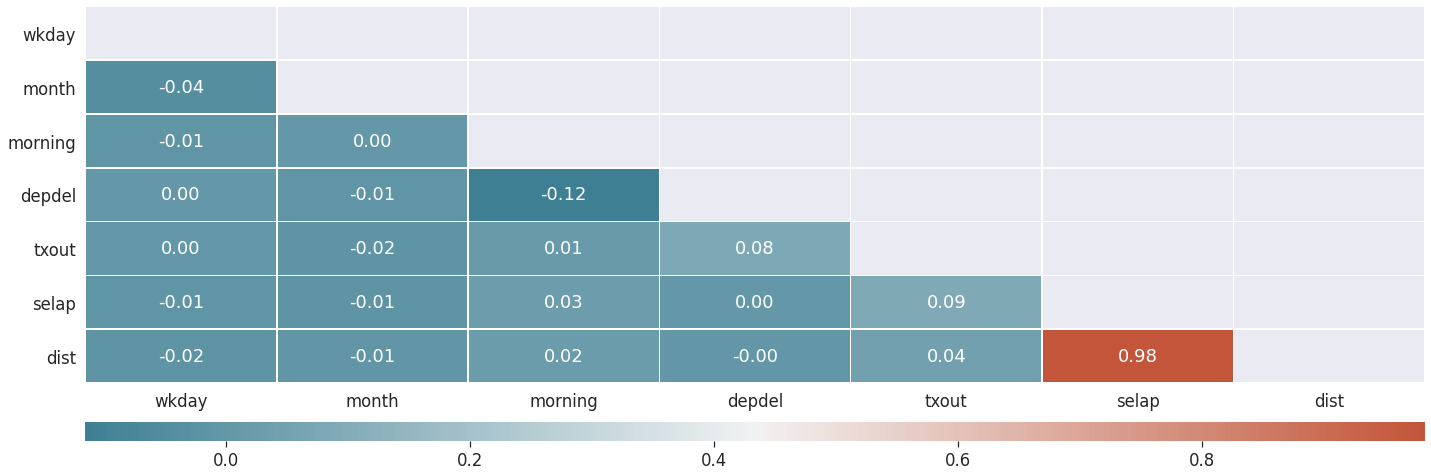


Gráfico de parcela


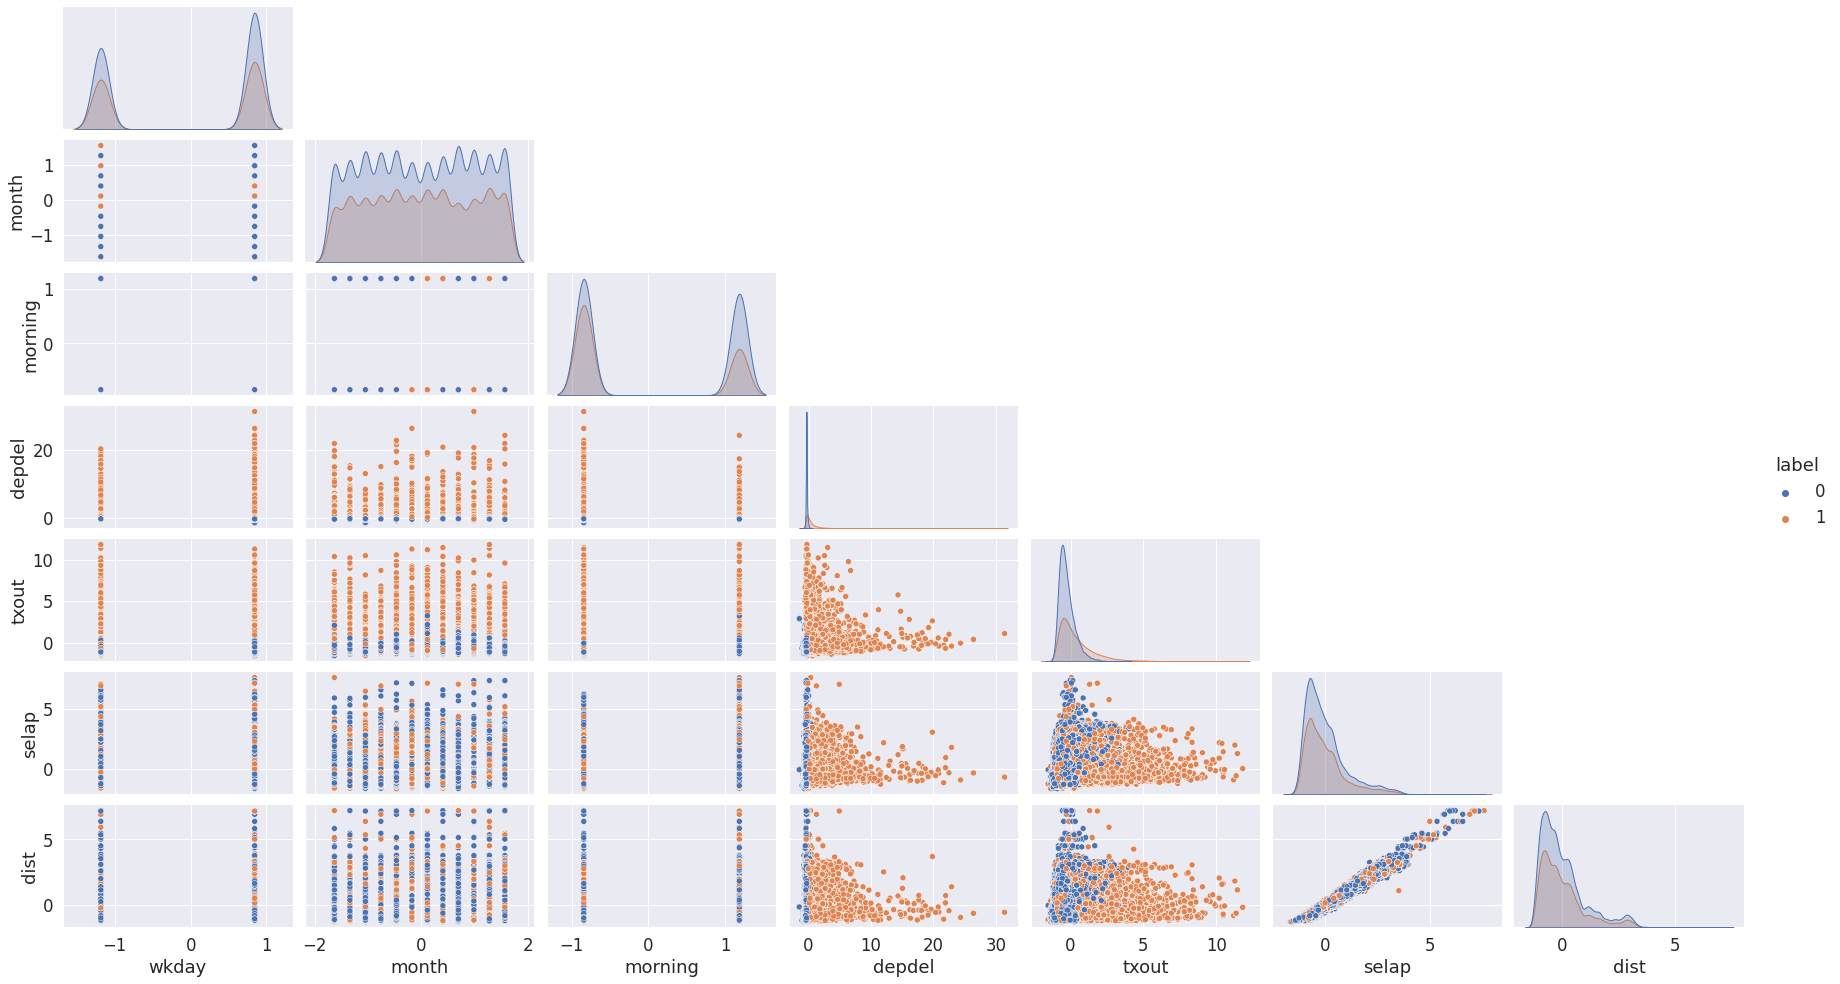


 Conjunto de datos vectorizado para proceso de ml 
+--------------------+-----+
|              scaled|label|
+--------------------+-----+
|[0.53425287028633...|  1.0|
|[0.10762112818071...|  1.0|
|[-0.2580632221955...|  0.0|
|[-0.2580632221955...|  0.0|
|[-0.2580632221955...|  0.0|
|[-0.2580632221955...|  0.0|
|[0.27014750612571...|  1.0|
|[-0.2580632221955...|  1.0|
|[-0.0752210470074...|  0.0|
|[-0.3596422084111...|  0.0|
+--------------------+-----+
only showing top 10 rows

root
 |-- scaled: vector (nullable = true)
 |-- label: double (nullable = true)



In [9]:
#librerías
from recursos import *
#leer de base de datos
#se carga la tabla tb_proyecto para presentar algunas visualizaciones y la tabla tb_proyectoml para aplicar los modelos de aprendizaje
# df_ft = (leer_df(table='tb_proyecto'), leer_df(table='tb_proyectoml'))

from preprocesamiento import *
df_list = crear_df(paths=['flights.csv', 'airports.csv', 'weather.csv'],
          formats=['csv', 'csv', 'csv'], headers=[True, False, True], samples_fr=[1., 1., 1.], rand_st=999, print_=False)
df_listready = preprocesar_df(df_list, print_=False)
df_jn = unir_df(df_listready, print_=False)
df_ft = feating(df_jn, print_=False)

sf1, sf2, ef = '\n\033[1m\033[103m\033[30m', '\n\033[1m\033[106m\033[30m', '\033[0m'
print(sf1, 'Conjunto cargado desde base de datos', '[', host, port, ']', sf2, 'Visualizaciones', ef)
plot_corr(df_ft[0].select('wkday','month','morning','depdel','txout','selap','dist','label'), inputcols=['wkday','month','morning','depdel','txout','selap','dist'])
dfml = cols2vec(df_ft[1], inputcols=df_ft[1].columns[:-1], outputcol='scaled')
print(sf2, 'Conjunto de datos vectorizado para proceso de ml', ef)
dfml.show(10)
dfml.printSchema()

In [10]:
# !pip install -U pandas-profiling #restart kernel
# import pandas_profiling #visualización de datos a través de la librería pandas_profiling
# df_pd = df_ft[0].select('carrier','wkday','month','morning','wtyp','wsev','depdel','txout','selap','dist','label')
# profile = pandas_profiling.ProfileReport(df_jn.toPandas(), title="Proyecto_BigData", html={"style": {"full_width": True}}, sort=None).to_file("/content/proyecto.html")

### Detalles acerca de las visualizaciones presentadas

  * Los valores presentados en las visualizaciones corresponden al conjunto de datos principal pre-procesado y estandarizado.

  * El mapa de calor permite observar la correlación ya sea directa o inversa entre las distintas variables numéricas del conjunto de datos.En este caso se observa un valor significativo (cercano a 1) entre la variable "dist" (distancia) y la variable "selap" (tiempo transcurrido), lo cual es esperado por la naturaleza de dichas características puesto que a mayor desplazamiento mayor será el tiempo empleado. En cuanto al resto de columnas no se aprecian otros valores significativos.

  * El gráfico de parcela, por un lado permite observar a través de su diagonal los histogramas correspondientes a cada columna individualmente y su posible función de distribución asociada, sea normal, exponencial, gamma, etc. Además, los diagramas de dispersión ayudan a realizar un análisis más detallado y visual acerca de la correlación y el aporte de variabilidad (información) asociado a cada par de variables y en este caso a cada clase de la columna objetivo "label", la cual está representada por cada color (azul=0, naranja=1).

  * Se puede confirmar la alta correlación vista en el mapa de calor con el gráfico de dispersión "selap/dist". Los gráficos de las variables nominales como "wday" (define si es un día entre semana o no), "month" (define el mes del año), "morning" (define si es antes o después del medio día), ayudan a determinar la separación correcta de las categorías y el comportamiento de las clases objetivo respecto a ellas. En el caso de la dispersión mostrada por la columna "depdel" (retraso en la salida), la separación de clases es muy evidente debido a que por lo general los retrasos en la salida de los despegues implican un retraso en la llegada, la cual corresponde a la variable objetivo, sin embargo esto no es una regla general y muchos de los vuelos logran reponer el tiempo perdido durante el transcurso del viaje.

  * [Visualizaciones mediante Pandas Profiling](https://drive.google.com/uc?export=download&id=16PZGlG9lX18ncbPUkG8FLfA5UMCepBEH)

---

## Entrenamiento (training)

---

In [11]:
'''
Determinaciones:
+ Se eligen 2 modelos de clasificación
  * Regresión logística
  * Bosques aleatorios
+ Se utiliza la técnica de validación cruzada "K-fold" para la parametrización, ajuste y análisis de los modelos
'''

#separación de datos: entrenamiento vs prueba (relación 70/30) se elije la separación aleatoria simple en lugar de la estratificada
# dftrain = dfml.stat.sampleBy('label', {0: 0.7, 1: 0.7}, seed=999)
# dftest = dfml.subtract(dftrain)
dftrain, dftest = dfml.randomSplit([.7,.3], seed=999) #separación del conjunto principal en datos de entrenamiento y prueba
dfsmall = dftrain.sample(False, 0.1, seed=999).cache() #muestra pequeña del conjunto de entrenamiento para realizar ajustes
print('Total de observaciones')
dfml.groupBy('label').count().show()
print('Entrenamiento')
print('Fracción: {:.2%}'.format(dftrain.count()/dfml.count()))
dftrain.groupBy('label').count().show()
print('Prueba')
print('Fracción: {:.2%}'.format(dftest.count()/dfml.count()))
dftest.groupBy('label').count().show()

#parametrización y ajustes del modelo
#logistic regression
pca_mod = PCA(inputCol='scaled', outputCol='pca')
lr_mod = LogisticRegression(featuresCol='pca', labelCol='label')
lr_estimador = pipe(stages=[pca_mod,lr_mod])
lr_grid = ParamGridBuilder()\
                            .addGrid(pca_mod.k, [10, 25, len(df_ft[1].columns[:-1])])\
                            .addGrid(lr_mod.maxIter, [5, 15, 25])\
                            .build()
lr_evaluator = BinaryClassificationEvaluator(metricName='areaUnderROC')
lr_cv = CrossValidator(estimator=lr_estimador, estimatorParamMaps=lr_grid, evaluator=lr_evaluator, numFolds=5)

#parametrización y ajustes del modelo
#random forest
pca_mod = PCA(inputCol='scaled', outputCol='pca')
rf_mod = RandomForestClassifier(featuresCol='pca', labelCol='label')
rf_estimador = pipe(stages=[pca_mod,rf_mod])
rf_grid = ParamGridBuilder()\
                            .addGrid(pca_mod.k, [10, 25, len(df_ft[1].columns[:-1])])\
                            .addGrid(rf_mod.numTrees, [10, 25, 50])\
                            .build()
rf_evaluator = BinaryClassificationEvaluator(metricName='areaUnderROC')
rf_cv = CrossValidator(estimator=rf_estimador, estimatorParamMaps=rf_grid, evaluator=rf_evaluator, numFolds=5)

Total de observaciones
+-----+-----+
|label|count|
+-----+-----+
|  0.0|61269|
|  1.0|39736|
+-----+-----+

Entrenamiento
Fracción: 70.23%
+-----+-----+
|label|count|
+-----+-----+
|  0.0|42922|
|  1.0|28016|
+-----+-----+

Prueba
Fracción: 29.77%
+-----+-----+
|label|count|
+-----+-----+
|  0.0|18347|
|  1.0|11720|
+-----+-----+



In [12]:
#modelado con muestra pequeña para ajuste de parámetros
# %time lr_cvmodel = lr_cv.fit(dfsmall)
# %time rf_cvmodel = rf_cv.fit(dfsmall)

#modelado con conjunto de entrenamiento
%time lr_cvmodel = lr_cv.fit(dftrain)
%time rf_cvmodel = rf_cv.fit(dftrain)

CPU times: user 3.74 s, sys: 693 ms, total: 4.43 s
Wall time: 4min 4s
CPU times: user 4.58 s, sys: 833 ms, total: 5.42 s
Wall time: 6min 29s


In [13]:
#resultados de las estimaciones y mejor estimación
sf1, sf2, ef = '\n\033[1m\033[106m\033[30m', '\n\033[1m\033[103m\033[30m', '\033[0m'
print('Resultados de la evaluación cruzada K-Fold')
print(sf2, 'Regresión logística', ef, lr_cvmodel.getEstimator())
print(sf1, 'Estimaciones realizadas', ef,' '.join('[{}: {:.2f}]'.format(*k) for k in enumerate(lr_cvmodel.avgMetrics)))
print(sf1, 'Mejor estimación', ef, lr_cvmodel.getEstimatorParamMaps()[np.argmax(lr_cvmodel.avgMetrics)], '\n')
print(sf2, 'Bosques aleatorios', ef, rf_cvmodel.getEstimator())
print(sf1, 'Estimaciones realizadas', ef,' '.join('[{}: {:.2f}]'.format(*k) for k in enumerate(rf_cvmodel.avgMetrics)))
print(sf1, 'Mejor estimación', ef, rf_cvmodel.getEstimatorParamMaps()[np.argmax(rf_cvmodel.avgMetrics)], '\n')

Resultados de la evaluación cruzada K-Fold

 Regresión logística  Pipeline_c8d3383c4669

 Estimaciones realizadas  [0: 0.74] [1: 0.74] [2: 0.74] [3: 0.76] [4: 0.76] [5: 0.76] [6: 0.91] [7: 0.92] [8: 0.92]

 Mejor estimación  {Param(parent='PCA_7db0519b3af6', name='k', doc='the number of principal components'): 39, Param(parent='LogisticRegression_a16470f691e1', name='maxIter', doc='max number of iterations (>= 0).'): 15} 


 Bosques aleatorios  Pipeline_cb62198b35a9

 Estimaciones realizadas  [0: 0.75] [1: 0.76] [2: 0.76] [3: 0.76] [4: 0.77] [5: 0.77] [6: 0.78] [7: 0.79] [8: 0.79]

 Mejor estimación  {Param(parent='PCA_bf11ffdffadd', name='k', doc='the number of principal components'): 39, Param(parent='RandomForestClassifier_d4507da5d635', name='numTrees', doc='Number of trees to train (>= 1).'): 50} 



## Evaluación (test)

---

In [14]:
#predicciones con conjunto de prueba
%time lr_predic = lr_cvmodel.transform(dftest).collect()
random.shuffle(lr_predic)
%time rf_predic = rf_cvmodel.transform(dftest).collect()
random.shuffle(rf_predic)

#métricas
scp = lambda x: spark.sparkContext.parallelize([(float(i[0]),float(i[1])) for i in x], 2)
#bcm = lambda x: BinaryClassificationMetrics(x, scoreCol='probability', labelCol='label')
lr_metrics = BinaryClassificationMetrics(spark.sparkContext.parallelize(list((float(i[1]),float(i[5])) for i in lr_predic), 2))
lr_report = classification_report(list(i[1] for i in lr_predic), list(i[5] for i in lr_predic))
rf_metrics = BinaryClassificationMetrics(spark.sparkContext.parallelize(list((float(i[1]),float(i[5])) for i in rf_predic), 2))
rf_report = classification_report(list(i[1] for i in rf_predic), list(i[5] for i in rf_predic))

CPU times: user 2.53 s, sys: 42.2 ms, total: 2.57 s
Wall time: 6.01 s
CPU times: user 2.7 s, sys: 42.2 ms, total: 2.74 s
Wall time: 7.1 s


Resultados de las evaluaciones para las predicciones obtenidas con el conjunto de prueba

 Regresión logística 
 Reporte de clasificación                precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     18347
         1.0       0.89      0.76      0.82     11720

    accuracy                           0.87     30067
   macro avg       0.87      0.85      0.86     30067
weighted avg       0.87      0.87      0.87     30067


---AUC ROC: 87.48%---	---AUC PR 73.82%---



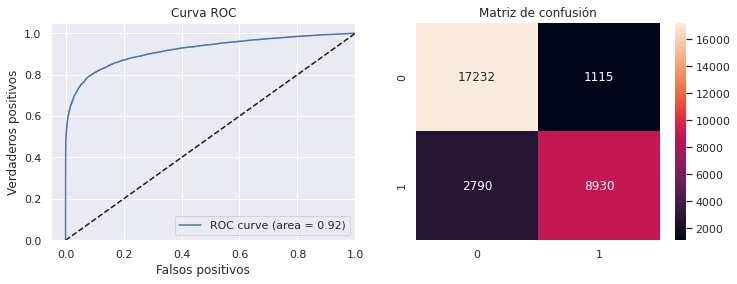



 Bosques aleatorios 
 Reporte de clasificación                precision    recall  f1-score   support

         0.0       0.71      0.96      0.82     18347
         1.0       0.87      0.39      0.54     11720

    accuracy                           0.74     30067
   macro avg       0.79      0.68      0.68     30067
weighted avg       0.78      0.74      0.71     30067


---AUC ROC: 79.30%---	---AUC PR 37.47%---



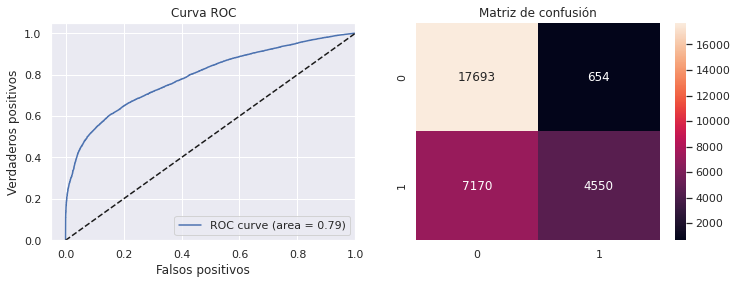

In [15]:
#resultados
sf1, sf2, ef = '\n\033[1m\033[106m\033[30m', '\n\033[1m\033[103m\033[30m', '\033[0m'
print('Resultados de las evaluaciones para las predicciones obtenidas con el conjunto de prueba')
print(sf1, 'Regresión logística', '\n Reporte de clasificación', ef, lr_report)
print('{}---AUC ROC: {:.2%}---\t---AUC PR {:.2%}---{}\n'.format(sf2, lr_metrics.areaUnderROC, lr_metrics.areaUnderPR, ef))
print(''.format(plot_metrics(lr_predic, ver=1)[0]))
print(sf1, 'Bosques aleatorios', '\n Reporte de clasificación', ef, rf_report)
print('{}---AUC ROC: {:.2%}---\t---AUC PR {:.2%}---{}\n'.format(sf2, rf_metrics.areaUnderROC, rf_metrics.areaUnderPR, ef))
print(''.format(plot_metrics(rf_predic, ver=1)[0]))


 Regresión logística 


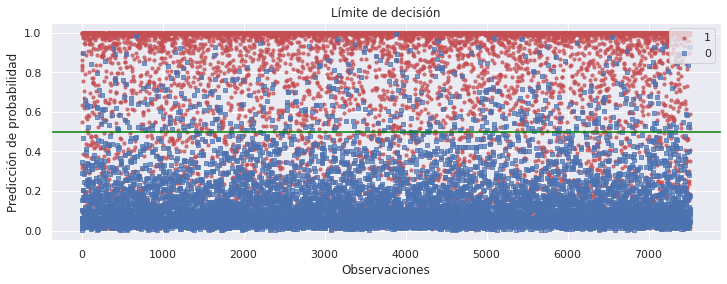


 Bosques aleatorios 


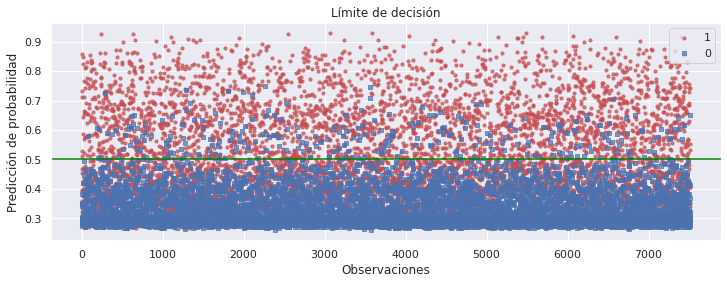

In [16]:
#visualizaciones
print(sf1, 'Regresión logística', ef)
plot_bound(np.array(list(i[4][1] for i in lr_predic if i[1]==1)), 
           np.array(list(i[4][1] for i in lr_predic if i[1]==0)), int(len(lr_predic)/2*0.5))
print(sf1, 'Bosques aleatorios', ef)
plot_bound(np.array(list(i[4][1] for i in rf_predic if i[1]==1)), 
           np.array(list(i[4][1] for i in rf_predic if i[1]==0)), int(len(rf_predic)/2*0.5))

In [17]:
#almacenamiento de modelos (opcional en caso que se deseen almacenar localmente)
# lr_cvmodel.write().overwrite().save('/'+str(lr_cvmodel.getEstimator()))
# rf_cvmodel.write().overwrite().save('/'+str(rf_cvmodel.getEstimator()))

#escritura de los resultados de las predicciones para cada modelo y lectura desde la base de datos para confirmación
# for dfin,tb,mod in zip([spark.sparkContext.parallelize(lr_predic).toDF(), 
#                         spark.sparkContext.parallelize(rf_predic).toDF()],
#                        ['tb_modelolr','tb_modelorf'], ['LR','RF']):
#   dfin = vec2cols(dfin, inputcol='scaled', outputcols=df_ft[1].columns[:-1],
#                   label='label', lab_alias='label', print_=False, prediction='prediction')
#   #almacenamiento en base de datos
#   escribir_df(df=dfin, table=tb)
#   #lectura desde base de datos
#   dfout = leer_df(table=tb)
#   print('Modelo: ', mod, '\tTabla: ', tb, sep='')
#   dfout.show(truncate=False)
#   dfout.printSchema()

---

## Análisis de resultados y conclusiones

  * Se realizó la carga, pre-procesamiento, ingeniería, almacenamiento en base de datos, entrenamiento y evaluación de 3 conjuntos de datos ensamblados, con poco más de 100 mil observaciones en total y 4 columnas numéricas más 6 columnas categóricas de atributos (antes de la codificación nominal), con una columna binaria de clases 1 y 0.

  * A partir del conjunto de datos almacenado se realizó una separación para entrenamiento y prueba con una relación 70/30, para luego aplicar un proceso de aprendizaje automático supervisado utilizando 2 modelos de clasificación: Regresión logística y Bosques aleatorios.

  * El entrenamiento de los modelos fue evaluado a través de la técnica de validación cruzada K-Fold y utlizando diferentes parametrizaciones en cada modelo por medio de una grilla paramétrica. K-fold realiza la selección del modelo al dividir el conjunto de datos aleatoriamente en partes que no se superponen y asignadas como conjuntos de prueba y entrenamiento separados. Gracias a esto no solo se logra estimar la habilidad de cada modelo, sino también cuál de todas las combinaciones paramétricas resultó mejor para cada uno.

  * La evaluación en entrenamiento da un mejor resultado para el modelo de **Regresión logística con un ___%**, seguido del modelo de **Bosques aleatorios con un ___%**. Además se obtuvieron los tiempos de ejecución para cada uno.
  
  * A continuación se muestran los tiempos de ejecución durante la fase de entrenamiento para cada modelo, todos realizados en el mismo ambiente y con el mismo conjunto de datos.

        Regresión logística
        # CPU times: 
        # Wall time: 
        Bosques aleatorios
        # CPU times: 
        # Wall time: 

  * Por otra parte, se ejecutó una etapa de evaluación con el conjunto de prueba con un reporte de resultados utilizando el módulo de Classification_report de spark.mllib, el cual permite mostrar las diferentes métricas de rendimiento en clasificación de clases comparando los resultados de las predicciones de cada modelo con las etiquetas correspondientes a cada observación.

  * Dentro de las métricas obtenidas se encuentran "Precision", "Recall", "F1-score".

  * Esta evaluación contempla el análisis tanto del **ROC** el cual muestra la compensación entre la tasa de verdaderos positivos y la tasa de falsos positivos, como del **Precision-Recall** que analiza la compensación entre la tasa positiva verdadera y el valor predictivo positivo; ambos utilizando diferentes umbrales de probabilidad para cada modelo.

  * Dado que las clases en el conjunto de datos están aceptablemente balanceadas se prefiere el uso del ROC para efectos de decidir cuál de los 2 modelos aporta mejor pronóstico probabilístico. En este caso el modelo de Regresión logística brinda un mejor pronóstico con un resultado del ___%, el cual está por encima del modelo de Bosques aleatorios que alcanza un ___%. Incluso logrando realizar el entrenamiento en un menor tiempo, por lo que su rendimiento final es mejor en comparación con el modelo de RF.

  * La curva ROC y la matriz de confusión también permiten apreciar visual y cuantitativamente la cantidad de aciertos que cada modelo alcanzó según la clase objetivo.

  * Finalmente se muestra un gráfico de dispersión con la probabilidad predicha para n observaciones versus su valor real identificado por medio de una codificación de colores y el límite de decisión aplicado, esto para cada modelo.

  * El proceso y los resultados se condideran satisfactorios.

  * Este trabajo permite mostrar de forma general la ruta que sigue un científico de datos desde la carga inicial de datos, hasta las etapas finales de predicción-evaluación y demuestra como la gran mayoría de los esfuerzos y recursos se centran en la fase de preprocesamiento. Como se dice usualmente, si se alimenta basura se obtendrá basura, de modo tal que los mejores modelos, configurados con los mejores parámetros, obtendrán terribles resultados si se alimentan de forma incorrecta.

---

# Código para generar HTML/PDF

---

In [18]:
# %%capture
# #opción #1 html
# !pip install nbconvert
# !sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-latex-recommended
# !pip install nb_pdf_template
# !python -m nb_pdf_template.install
# !pip install -U notebook-as-pdf
# !jupyter nbconvert --to html BIGDATA_07_2021_ProyectoFinal_ESV.ipynb #--template classic

# #opción #2 pdf
# !wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
# from colab_pdf import colab_pdf
# colab_pdf('.ipynb')